In [1]:
#%pip install pygame

In [2]:
#import sys
#print(sys.path)
# save to pdf: sudo jupyter nbconvert --to pdf dog_sounds_overview.ipynb

In [2]:
#pip install librosa
import torch                                         # imports the core PyTorch library
import torch.nn as nn                                # torch.nn library is a high-level interface for building and training neural networks
import torch.optim as optim                          # Needed for optimizer
from torch.utils.data import DataLoader              # Needed for loading data from MNIST png files
from torchvision import datasets, transforms         # Needed for making sure data from MNIST png files is properly formatted 
import torch.nn.functional as F                      # Needed for functional equation in forward loop
import numpy as np                                   # Needed for outputting weights and biases
from torchvision.datasets import VisionDataset       # VisionDataset is is designed to be a base class for datasets in computer vision tasks
from PIL import Image                                # Needed for manipulating MNIST png image files 
import os                                            # Needed for operating system for dealing with dir of training and test png files
from torchvision import transforms
from skimage import exposure
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.datasets.vision import VisionDataset
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
from python_speech_features import mfcc
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import pygame
import random


# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"
# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")

pygame 2.5.2 (SDL 2.28.3, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html
Is MPS (Metal Performance Shader) built? True


In [3]:
# Set the path to the directory containing WAV files
#directory_path = '/Users/peternoble/Downloads/cats_dogs/dog'
directory_path = '/Users/peternoble/Desktop/daseedataset/dog_train/dog3'

# Get a list of all WAV files in the directory
wav_files = [file for file in os.listdir(directory_path) if file.endswith('.wav')]

# Check if there are any WAV files in the directory
if not wav_files:
    print("No WAV files found in the directory.")
else:
    # Randomly pick a WAV file
    file_name = random.choice(wav_files)

    # Construct the full path to the randomly chosen WAV file
    file_path = os.path.join(directory_path, file_name)

    # Display the randomly chosen WAV file
    print(f"Randomly chosen WAV file: {file_path}")

    # Load the randomly chosen WAV file
    y, sr = librosa.load(file_path)


Randomly chosen WAV file: /Users/peternoble/Desktop/daseedataset/dog_train/dog3/living_3_dog_10431_4_white_80_Children_25.wav


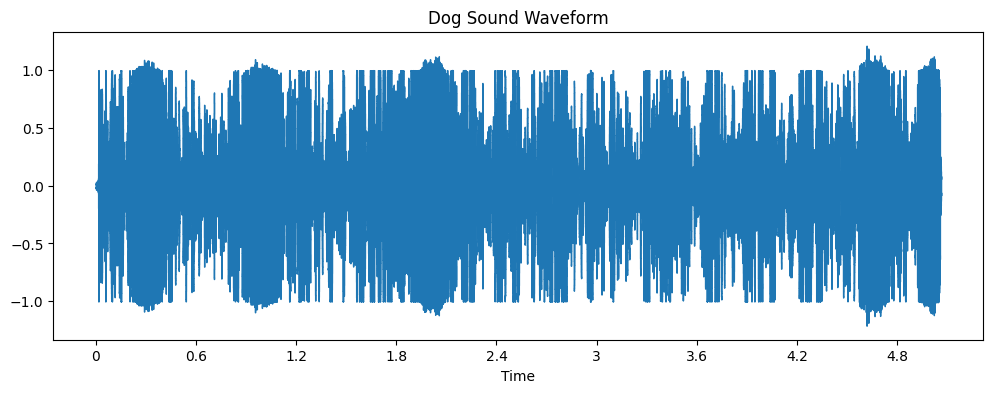

/var/folders/dz/ht5z7gwn5rsb_m4hrz9_1_740000gq/T/ipykernel_29477/1597721392.py:8: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


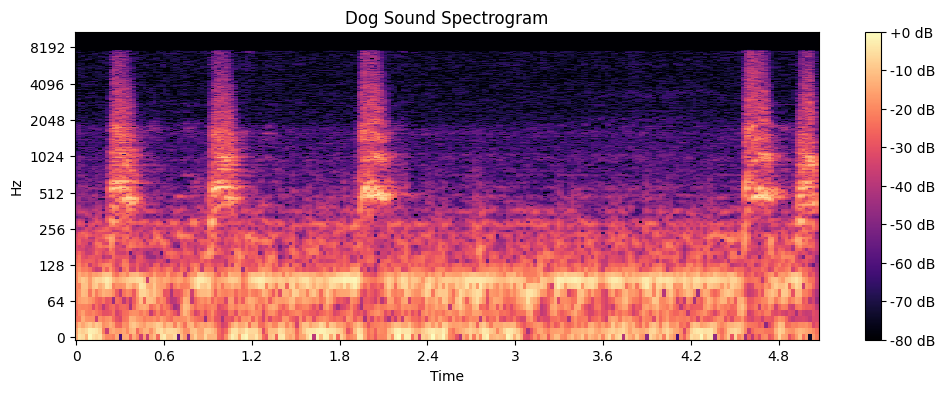

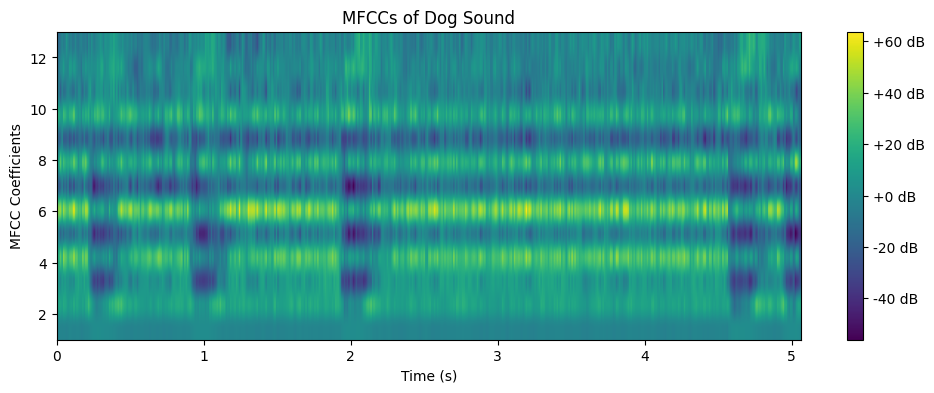

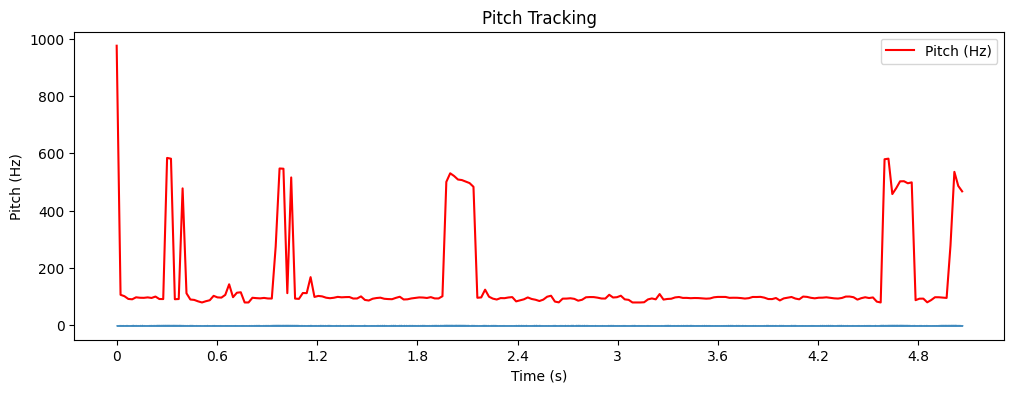

In [4]:
# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Dog Sound Waveform')
plt.show()

# Generate a spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Dog Sound Spectrogram')
plt.show()

# Set the number of MFCC coefficients (n_mfcc)
n_mfcc = 13

# Extract MFCCs
mfccs = mfcc(y, sr, numcep=n_mfcc)

# Display MFCCs
plt.figure(figsize=(12, 4))
plt.imshow(mfccs.T, origin='lower', aspect='auto', cmap='viridis', extent=[0, len(y)/sr, 1, n_mfcc])
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs of Dog Sound')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()
# Load an example audio file or replace 'filename' with the path to your audio file
y, sr = librosa.load(file_path)

# Set the minimum and maximum frequencies for pitch tracking
fmin = 80  # Adjust according to your expected pitch range
fmax = 1000  # Adjust according to your expected pitch range

# Compute pitch using librosa's YIN algorithm
pitch = librosa.core.yin(y, fmin=fmin, fmax=fmax)

# Extract time values from the pitch tracking results
times = librosa.times_like(pitch, sr=sr)

# Plot the pitch tracking results
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.plot(times, pitch, label='Pitch (Hz)', color='r')
plt.title('Pitch Tracking')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.show()


In [5]:
n_mfcc = 13

# Extract the filename without extension
base_name = os.path.splitext(file_name)[0]

# Create a PDF file to save the plots with the filename as the name
pdf_path = f'{base_name}_plots.pdf'

# Create a PDF file to save the plots
#pdf_path = 'plots.pdf'
with PdfPages(pdf_path) as pdf:
    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Dog Sound Waveform')
    pdf.savefig()  # Saves the current figure into a pdf page
    plt.close()

    # Generate a spectrogram
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Dog Sound Spectrogram')
    pdf.savefig()
    plt.close()

    # Extract MFCCs
    mfccs = mfcc(y, sr, numcep=n_mfcc)

    # Display MFCCs
    plt.figure(figsize=(12, 4))
    plt.imshow(mfccs.T, origin='lower', aspect='auto', cmap='viridis', extent=[0, len(y)/sr, 1, n_mfcc])
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCs of Dog Sound')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    pdf.savefig()
    plt.close()

    # Compute pitch using librosa's YIN algorithm
    pitch = librosa.core.yin(y, fmin=fmin, fmax=fmax)

    # Plot the pitch tracking results
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.8)
    plt.plot(times, pitch, label='Pitch (Hz)', color='r')
    plt.title('Pitch Tracking')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    pdf.savefig()
    plt.close()

# The plots are now saved in the specified PDF file.
print(f"Plots saved to: {pdf_path}")



/var/folders/dz/ht5z7gwn5rsb_m4hrz9_1_740000gq/T/ipykernel_29477/2990387023.py:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


Plots saved to: living_3_dog_10431_4_white_80_Children_25_plots.pdf


In [6]:
def play_wav(file_path):
    pygame.init()
    pygame.mixer.init()

    try:
        # Load the WAV file
        sound = pygame.mixer.Sound(file_path)

        # Play the sound
        sound.play()

        # Wait for the sound to finish playing
        pygame.time.wait(int(sound.get_length() * 1000))

    except pygame.error as e:
        print(f"Error playing WAV file: {e}")

    finally:
        pygame.quit()

# Example: Replace 'your_wav_file.wav' with the path to your WAV file
play_wav(file_path)